<a href="https://colab.research.google.com/github/HARSHIT097/Learnings/blob/main/Play_with_tsdata001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime
import random
import numpy as np

# Bike ride sharing data

Create Bike Rides Data

In [ ]:
random.seed(38)
ride_start_time = datetime.datetime.today()
ride_end_time = ride_start_time + datetime.timedelta(minutes=20)
ride_start_times = []
ride_end_times = []
count_of_rides = 6

for ride in range(count_of_rides):
    minutes_between_rides = random.randint(8, 100)
    ride_start_time = ride_end_time + datetime.timedelta(minutes=minutes_between_rides)
    
    minutes_riding = random.randint(5, 25)
    ride_end_time = ride_start_time + datetime.timedelta(minutes=minutes_riding)
    
    ride_start_times.append(ride_start_time)
    ride_end_times.append(ride_end_time)

In [ ]:
data = {'ride_start_time': ride_start_times,
        'ride_end_time':  ride_end_times
       }
df_bike_rides = pd.DataFrame(data)

In [ ]:
df_bike_rides.head(2)

,ride_start_time,ride_end_time
0,2021-05-14 23:28:59.025882,2021-05-14 23:46:59.025882
1,2021-05-15 00:48:59.025882,2021-05-15 00:56:59.025882


In [ ]:
#Find the Mean Duration of Time, in Minutes, Bike is Left Idle Between Rides

In [ ]:
df_bike_rides['previous_ride_end_time'] = df_bike_rides['ride_end_time'].shift(periods=1)

In [ ]:
df_bike_rides['duration_bike_idle_between_rides'] = df_bike_rides['ride_start_time'] - df_bike_rides['previous_ride_end_time']

In [ ]:
df_bike_rides['minutes_bike_idle_between_rides'] = df_bike_rides['duration_bike_idle_between_rides'].dt.total_seconds()/60

In [ ]:
df_bike_rides.tail(2)

,ride_start_time,ride_end_time,previous_ride_end_time,duration_bike_idle_between_rides,minutes_bike_idle_between_rides
4,2021-05-15 04:19:59.025882,2021-05-15 04:25:59.025882,2021-05-15 03:24:59.025882,0 days 00:55:00,55.0
5,2021-05-15 05:50:59.025882,2021-05-15 06:00:59.025882,2021-05-15 04:25:59.025882,0 days 01:25:00,85.0


In [ ]:
#calculate the mean minutes_bike_idle_between_rides 
avg_minutes_bikes_idle_between_rides = df_bike_rides['minutes_bike_idle_between_rides'].mean()
avg_minutes_bikes_idle_between_rides

63.0

Duration Idle Time Between Bike Rides Per Unique Bike¶

In [ ]:
#create a pandas dataframe with details on bike ride times, the bike id and the start and end station.
data = {'ride_start_time': ride_start_times,
        'ride_end_time':  ride_end_times,
        'bike_id': [1, 22, 1, 1, 22, 22],
        'start_station': ["21st & Folsom", "21st & Folsom", "4th & King", "24th & Valencia", "4th & King",  "16th and Mission"],
        'end_station':  ["4th & King", "4th & King", "24th & Valencia", "Embarcadero & Market",  "16th and Mission", "4th & King"]
       }
df_bike_sharing = pd.DataFrame(data)

In [ ]:
#sort df_bike_sharing first by the bike_id column and then the ride_start_time column.
df_bike_sharing.sort_values(by=['bike_id', 'ride_start_time'], inplace=True)

In [ ]:
df_bike_sharing.head()

,ride_start_time,ride_end_time,bike_id,start_station,end_station
0,2021-05-14 23:28:59.025882,2021-05-14 23:46:59.025882,1,21st & Folsom,4th & King
2,2021-05-15 01:12:59.025882,2021-05-15 01:28:59.025882,1,4th & King,24th & Valencia
3,2021-05-15 03:05:59.025882,2021-05-15 03:24:59.025882,1,24th & Valencia,Embarcadero & Market
1,2021-05-15 00:48:59.025882,2021-05-15 00:56:59.025882,22,21st & Folsom,4th & King
4,2021-05-15 04:19:59.025882,2021-05-15 04:25:59.025882,22,4th & King,16th and Mission


For the bike_id column, I shift down values by 1 to create a new column called previous_bike_id. I do this so I can easily compare a bike id to the previous ride's ID to identify the last ride by a bike id for a day.

Similar to LAG()

In [ ]:
df_bike_sharing['previous_bike_id'] = df_bike_sharing['bike_id'].shift(periods=1)

SELECT *, LAG(bike_id) OVER (ORDER BY bike_id ASC, ride_start_time ASC) AS previous_bike_id
FROM df_bike_sharing 
ORDER BY bike_id ASC, ride_start_time ASC

In [ ]:
df_bike_sharing['previous_ride_end_time'] = df_bike_sharing['ride_end_time'].shift(periods=1)

In [ ]:
# to calculate a duration the bike was idle in a row if it's a comparison for the same bike id. Below I show the code to replace all values 
#in a row with NaN or NaT if the condition is false.
df_bike_sharing.where(df_bike_sharing['bike_id'] == df_bike_sharing['previous_bike_id'])

,ride_start_time,ride_end_time,bike_id,start_station,end_station,previous_bike_id,previous_ride_end_time
0,NaT,NaT,NaN,NaN,NaN,NaN,NaT
2,2021-05-15 01:12:59.025882,2021-05-15 01:28:59.025882,1.0,4th & King,24th & Valencia,1.0,2021-05-14 23:46:59.025882
3,2021-05-15 03:05:59.025882,2021-05-15 03:24:59.025882,1.0,24th & Valencia,Embarcadero & Market,1.0,2021-05-15 01:28:59.025882
1,NaT,NaT,NaN,NaN,NaN,NaN,NaT
4,2021-05-15 04:19:59.025882,2021-05-15 04:25:59.025882,22.0,4th & King,16th and Mission,22.0,2021-05-15 00:56:59.025882
5,2021-05-15 05:50:59.025882,2021-05-15 06:00:59.025882,22.0,16th and Mission,4th & King,22.0,2021-05-15 04:25:59.025882


In [ ]:
df_bike_sharing['duration_bike_idle'] = (df_bike_sharing['ride_start_time']-df_bike_sharing['previous_ride_end_time']).where(df_bike_sharing['bike_id'] == df_bike_sharing['previous_bike_id'])

In [ ]:
#I drop previous_bike_id and previous_ride_end_time since they were intermediary outputs used for calculations.
# They're not necessary for a final presentation of the critical details.
df_bike_sharing['duration_bike_idle_seconds'] = df_bike_sharing['duration_bike_idle'].dt.total_seconds()

Here is the average seconds each bike_id is idle during the day in seconds between the first and last ride. I group by the bike_id column and calculate the mean of the duration_bike_idle_seconds_time column. I reset the index and rename the columns so this final output is easier to understand.

Bike id of 22 was left idle longer between rides than the bike id of 1.


In [ ]:
df_bike_sharing.groupby('bike_id')['duration_bike_idle_seconds'].mean().reset_index().rename(columns={'duration_bike_idle_seconds': 'avg_seconds_idle_between_rides'})

,bike_id,avg_seconds_idle_between_rides
0,1,5490.0
1,22,8640.0


# Air Quality Data

In [1]:
#!wget https://github.com/pandas-dev/pandas/blob/master/doc/data/air_quality_no2_long.csv

--2021-05-19 19:37:58--  https://github.com/pandas-dev/pandas/blob/master/doc/data/air_quality_no2_long.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘air_quality_no2_long.csv’

air_quality_no2_lon     [ <=>                ] 881.89K  --.-KB/s    in 0.08s   

2021-05-19 19:37:58 (11.2 MB/s) - ‘air_quality_no2_long.csv’ saved [903051]



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [11]:
data = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2_long.csv")
#parse_dates can be used
data.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   datetime   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [17]:
data.rename(columns={"date.utc" : "datetime"}, inplace=True)

In [19]:
data.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [20]:
data.nunique()

city            3
country         3
datetime     1033
location        3
parameter       1
value         458
unit            1
dtype: int64

In [21]:
data["datetime"] = pd.to_datetime(data["datetime"])

In [22]:
data["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

In [23]:
start, end =data["datetime"].min(), data["datetime"].max()
print(start, end)

2019-05-07 01:00:00+00:00 2019-06-21 00:00:00+00:00


In [26]:
#to calculate with date information and make them comparable
diff = end - start
diff

Timedelta('44 days 23:00:00')

In [27]:
#creating new column from date
data["month"] = data["datetime"].dt.month

In [28]:
data.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


In [29]:
#What is the average NO2 concentration for each day of the week for each of the measurement locations?

#using group by
data.groupby([data["datetime"].dt.weekday, "location"])["value"].mean()
#save it to new df if we want

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

Plot the typical NO2 pattern during the day of our time series of all stations together. In other words, what is the average value for each hour of the day?

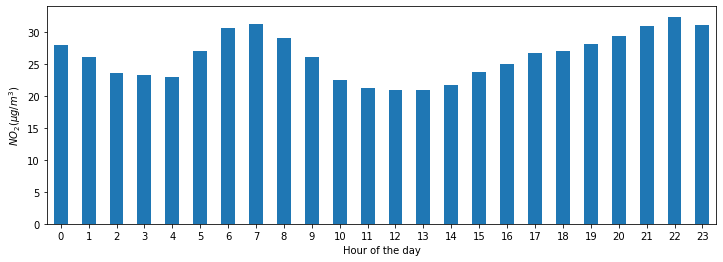

In [32]:
fig, axs = plt.subplots(figsize=(12, 4))

data.groupby(data["datetime"].dt.hour)["value"].mean().plot(kind='bar',rot=0, ax=axs)
plt.xlabel("Hour of the day");  # custom x label using matplotlib
plt.ylabel("$NO_2 (µg/m^3)$");

#datetime index

to reshape the data table with each of the measurements locations as a separate column

In [33]:
no_2 = data.pivot(index="datetime", columns="location", values="value")
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


In [34]:
no_2.index.year, no_2.index.weekday

(Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
             ...
             2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
            dtype='int64', name='datetime', length=1033),
 Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
            dtype='int64', name='datetime', length=1033))

Create a plot of the NO2 values in the different stations from the 20th of May till the end of 21st of May

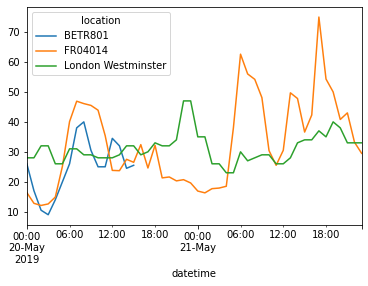

In [35]:
no_2["2019-05-20":"2019-05-21"].plot()

Resample a time series to another frequency

Aggregate the current hourly time series values to the monthly maximum value in each of the stations.

In [36]:
monthly_max = no_2.resample("M").max()
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


In [37]:
# the frequency of the time series is provided by the freq attribute:

monthly_max.index.freq

<MonthEnd>

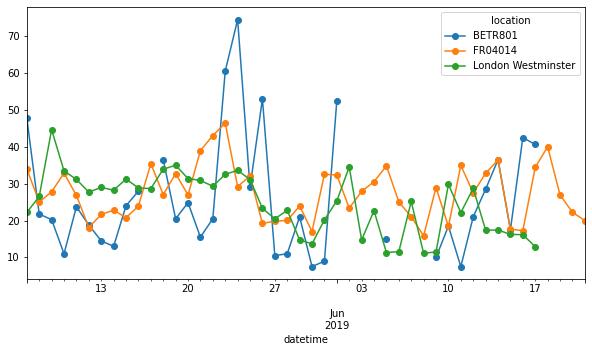

In [38]:
#Make a plot of the daily mean NO2 value in each of the stations.

no_2.resample("D").mean().plot(style="-o", figsize=(10, 5));

In [39]:
#gGenerate sequences of fixed-frequency dates and time spans
dti = pd.date_range("2018-01-01", periods=3, freq="H")
dti

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')